In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path().cwd().parent))

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
# обратите внимание, модуля model нет в корне ваших репозиториев, тк он содержит ответы, этот модуль появится
# после прохождения задания
import model
import dataset
from plotting import plot_ts

### Возьмем временной ряд

In [7]:
dataset = dataset.Dataset('../data/dataset/')

In [8]:
ts = dataset['daily-min-temperatures.csv']

In [9]:
ts.head()

1981-01-01
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
Name: 20.7, dtype: float64

<Axes: xlabel='1981-01-01'>

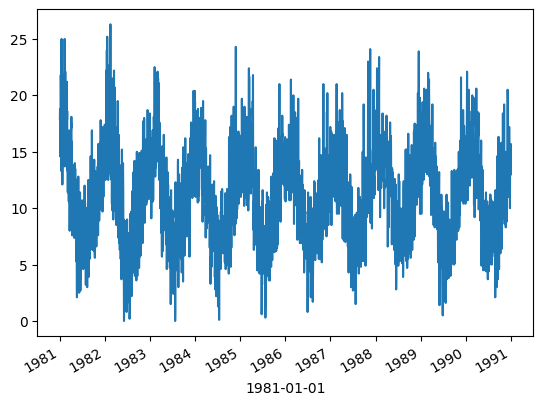

In [10]:
ts.plot()

###  Зададим гранулярность

In [11]:
# гранулярность, она же частота временного ряда, задается в согласии с форматов iso6801
# https://en.wikipedia.org/wiki/ISO_8601
granularity = 'P1D'

In [12]:
import isodate
isodate.parse_duration(granularity)

datetime.timedelta(days=1)

### Зададим ширину окна

In [13]:
num_lags = 7

### Зададим модель

In [14]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression

### Создадим экзэмпляр класса TimeSeriesPredictor

In [15]:
predictor = model.TimeSeriesPredictor(
    granularity=granularity,
    num_lags=num_lags,
    model=Model
)

### Посмотрим, как работает метод transform_into_matrix

In [16]:
lags_matrix = predictor.transform_into_matrix(ts)

In [17]:
ts[:20]

1981-01-01
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
1981-01-07    15.8
1981-01-08    17.4
1981-01-09    21.8
1981-01-10    20.0
1981-01-11    16.2
1981-01-12    13.3
1981-01-13    16.7
1981-01-14    21.5
1981-01-15    25.0
1981-01-16    20.7
1981-01-17    20.6
1981-01-18    24.8
1981-01-19    17.7
1981-01-20    15.5
1981-01-21    18.2
Name: 20.7, dtype: float64

In [18]:
lags_matrix[:10]

lag_7  lag_6  lag_5  lag_4  lag_3  lag_2  lag_1  lag_0
1981-01-01                                                        
1981-01-09   17.9   18.8   14.6   15.8   15.8   15.8   17.4   21.8
1981-01-10   18.8   14.6   15.8   15.8   15.8   17.4   21.8   20.0
1981-01-11   14.6   15.8   15.8   15.8   17.4   21.8   20.0   16.2
1981-01-12   15.8   15.8   15.8   17.4   21.8   20.0   16.2   13.3
1981-01-13   15.8   15.8   17.4   21.8   20.0   16.2   13.3   16.7
1981-01-14   15.8   17.4   21.8   20.0   16.2   13.3   16.7   21.5
1981-01-15   17.4   21.8   20.0   16.2   13.3   16.7   21.5   25.0
1981-01-16   21.8   20.0   16.2   13.3   16.7   21.5   25.0   20.7
1981-01-17   20.0   16.2   13.3   16.7   21.5   25.0   20.7   20.6
1981-01-18   16.2   13.3   16.7   21.5   25.0   20.7   20.6   24.8

### Обучим модель

In [19]:
predictor.fit(ts)

### Предскажем следующие несколько точек

In [20]:
prediction = predictor.predict_next(ts, n_steps=365)

In [21]:
prediction

1991-01-01    12.811619
1991-01-02    13.175679
1991-01-03    13.268553
1991-01-04    13.216781
1991-01-05    13.101261
                ...    
1991-12-27    11.146489
1991-12-28    11.146489
1991-12-29    11.146489
1991-12-30    11.146489
1991-12-31    11.146489
Length: 365, dtype: float64

In [22]:
plot_ts(ts, prediction)

Loading BokehJS ...

### Зададим сторонние признаки

In [23]:
import math

from pandas._libs.tslibs.timestamps import Timestamp


def get_month_sin(timestamp: Timestamp) -> float:
    theta = timestamp.month * (2*math.pi / 12)
    return math.sin(theta)


def get_month_cos(timestamp: Timestamp) -> float:
    theta = timestamp.month * (2*math.pi / 12)
    return math.cos(theta)


def get_day_sin(timestamp: Timestamp) -> float:
    theta = timestamp.day * (2*math.pi / timestamp.days_in_month)
    return math.sin(theta)


def get_day_cos(timestamp: Timestamp) -> float:
    theta = timestamp.day * (2*math.pi / timestamp.days_in_month)
    return math.cos(theta)


def get_dayofweek_sin(timestamp: Timestamp) -> float:
    theta = timestamp.dayofweek * (2*math.pi / 7)
    return math.sin(theta)


def get_dayofweek_cos(timestamp: Timestamp) -> float:
    theta = timestamp.dayofweek * (2*math.pi / 7)
    return math.cos(theta)


def get_hour_sin(timestamp: Timestamp) -> float:
    theta = timestamp.hour * (2*math.pi / 24)
    return math.sin(theta)


def get_hour_cos(timestamp: Timestamp) -> float:
    theta = timestamp.hour * (2*math.pi / 24)
    return math.cos(theta)


def get_minute_sin(timestamp: Timestamp) -> float:
    theta = timestamp.minute * (2*math.pi / 60)
    return math.sin(theta)


def get_minute_cos(timestamp: Timestamp) -> float:
    theta = timestamp.minute * (2*math.pi / 60)
    return math.cos(theta)


datetime_mappers = {
    'month_sin': get_month_sin,
    'month_cos': get_month_cos,
    'day_sin': get_day_sin,
    'day_cos': get_day_cos,
    'dayofweek_sin': get_dayofweek_sin,
    'dayofweek_cos': get_dayofweek_cos,
    'hour_sin': get_hour_sin,
    'hour_cos': get_hour_cos,
    'minute_sin': get_minute_sin,
    'minute_cos': get_minute_cos,
}

### Добавим сторонние признаки

In [24]:
predictor = model.TimeSeriesPredictor(
    granularity=granularity,
    num_lags=num_lags,
    model=Model,
    mappers=datetime_mappers,
)

In [25]:
feature_matrix = predictor.enrich(lags_matrix)

In [26]:
feature_matrix

lag_7  lag_6  lag_5  lag_4  lag_3  lag_2  lag_1  lag_0  \
1981-01-01                                                           
1981-01-09   17.9   18.8   14.6   15.8   15.8   15.8   17.4   21.8   
1981-01-10   18.8   14.6   15.8   15.8   15.8   17.4   21.8   20.0   
1981-01-11   14.6   15.8   15.8   15.8   17.4   21.8   20.0   16.2   
1981-01-12   15.8   15.8   15.8   17.4   21.8   20.0   16.2   13.3   
1981-01-13   15.8   15.8   17.4   21.8   20.0   16.2   13.3   16.7   
...           ...    ...    ...    ...    ...    ...    ...    ...   
1990-12-27   15.4   13.1   13.2   13.9   10.0   12.9   14.6   14.0   
1990-12-28   13.1   13.2   13.9   10.0   12.9   14.6   14.0   13.6   
1990-12-29   13.2   13.9   10.0   12.9   14.6   14.0   13.6   13.5   
1990-12-30   13.9   10.0   12.9   14.6   14.0   13.6   13.5   15.7   
1990-12-31   10.0   12.9   14.6   14.0   13.6   13.5   15.7   13.0   

               month_sin  month_cos       day_sin   day_cos  dayofweek_sin  \
1981-01-01                                                                   
1981-01-09  5.000000e-01   0.866025  9.680771e-01 -0.250653      -0.433884   
1981-01-10  5.000000e-01   0.866025  8.978045e-01 -0.440394      -0.974928   
1981-01-11  5.000000e-01   0.866025  7.907757e-01 -0.612106      -0.781831   
1981-01-12  5.000000e-01   0.866025  6.513725e-01 -0.758758       0.000000   
1981-01-13  5.000000e-01   0.866025  4.853020e-01 -0.874347       0.781831   
...                  ...        ...           ...       ...            ...   
1990-12-27 -2.449294e-16   1.000000 -7.247928e-01  0.688967       0.433884   
1990-12-28 -2.449294e-16   1.000000 -5.712682e-01  0.820763      -0.433884   
1990-12-29 -2.449294e-16   1.000000 -3.943559e-01  0.918958      -0.974928   
1990-12-30 -2.449294e-16   1.000000 -2.012985e-01  0.979530      -0.781831   
1990-12-31 -2.449294e-16   1.000000 -2.449294e-16  1.000000       0.000000   

            dayofweek_cos  hour_sin  hour_cos  minute_sin  minute_cos  
1981-01-01                                                             
1981-01-09      -0.900969       0.0       1.0         0.0         1.0  
1981-01-10      -0.222521       0.0       1.0         0.0         1.0  
1981-01-11       0.623490       0.0       1.0         0.0         1.0  
1981-01-12       1.000000       0.0       1.0         0.0         1.0  
1981-01-13       0.623490       0.0       1.0         0.0         1.0  
...                   ...       ...       ...         ...         ...  
1990-12-27      -0.900969       0.0       1.0         0.0         1.0  
1990-12-28      -0.900969       0.0       1.0         0.0         1.0  
1990-12-29      -0.222521       0.0       1.0         0.0         1.0  
1990-12-30       0.623490       0.0       1.0         0.0         1.0  
1990-12-31       1.000000       0.0       1.0         0.0         1.0  

[3642 rows x 18 columns]

In [27]:
predictor.mappers

{'month_sin': <function __main__.get_month_sin(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> float>,
 'month_cos': <function __main__.get_month_cos(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> float>,
 'day_sin': <function __main__.get_day_sin(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> float>,
 'day_cos': <function __main__.get_day_cos(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> float>,
 'dayofweek_sin': <function __main__.get_dayofweek_sin(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> float>,
 'dayofweek_cos': <function __main__.get_dayofweek_cos(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> float>,
 'hour_sin': <function __main__.get_hour_sin(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> float>,
 'hour_cos': <function __main__.get_hour_cos(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> float>,
 'minute_sin': <function __main__.get_minute_sin(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> flo

In [28]:
feature_matrix

lag_7  lag_6  lag_5  lag_4  lag_3  lag_2  lag_1  lag_0  \
1981-01-01                                                           
1981-01-09   17.9   18.8   14.6   15.8   15.8   15.8   17.4   21.8   
1981-01-10   18.8   14.6   15.8   15.8   15.8   17.4   21.8   20.0   
1981-01-11   14.6   15.8   15.8   15.8   17.4   21.8   20.0   16.2   
1981-01-12   15.8   15.8   15.8   17.4   21.8   20.0   16.2   13.3   
1981-01-13   15.8   15.8   17.4   21.8   20.0   16.2   13.3   16.7   
...           ...    ...    ...    ...    ...    ...    ...    ...   
1990-12-27   15.4   13.1   13.2   13.9   10.0   12.9   14.6   14.0   
1990-12-28   13.1   13.2   13.9   10.0   12.9   14.6   14.0   13.6   
1990-12-29   13.2   13.9   10.0   12.9   14.6   14.0   13.6   13.5   
1990-12-30   13.9   10.0   12.9   14.6   14.0   13.6   13.5   15.7   
1990-12-31   10.0   12.9   14.6   14.0   13.6   13.5   15.7   13.0   

               month_sin  month_cos       day_sin   day_cos  dayofweek_sin  \
1981-01-01                                                                   
1981-01-09  5.000000e-01   0.866025  9.680771e-01 -0.250653      -0.433884   
1981-01-10  5.000000e-01   0.866025  8.978045e-01 -0.440394      -0.974928   
1981-01-11  5.000000e-01   0.866025  7.907757e-01 -0.612106      -0.781831   
1981-01-12  5.000000e-01   0.866025  6.513725e-01 -0.758758       0.000000   
1981-01-13  5.000000e-01   0.866025  4.853020e-01 -0.874347       0.781831   
...                  ...        ...           ...       ...            ...   
1990-12-27 -2.449294e-16   1.000000 -7.247928e-01  0.688967       0.433884   
1990-12-28 -2.449294e-16   1.000000 -5.712682e-01  0.820763      -0.433884   
1990-12-29 -2.449294e-16   1.000000 -3.943559e-01  0.918958      -0.974928   
1990-12-30 -2.449294e-16   1.000000 -2.012985e-01  0.979530      -0.781831   
1990-12-31 -2.449294e-16   1.000000 -2.449294e-16  1.000000       0.000000   

            dayofweek_cos  hour_sin  hour_cos  minute_sin  minute_cos  
1981-01-01                                                             
1981-01-09      -0.900969       0.0       1.0         0.0         1.0  
1981-01-10      -0.222521       0.0       1.0         0.0         1.0  
1981-01-11       0.623490       0.0       1.0         0.0         1.0  
1981-01-12       1.000000       0.0       1.0         0.0         1.0  
1981-01-13       0.623490       0.0       1.0         0.0         1.0  
...                   ...       ...       ...         ...         ...  
1990-12-27      -0.900969       0.0       1.0         0.0         1.0  
1990-12-28      -0.900969       0.0       1.0         0.0         1.0  
1990-12-29      -0.222521       0.0       1.0         0.0         1.0  
1990-12-30       0.623490       0.0       1.0         0.0         1.0  
1990-12-31       1.000000       0.0       1.0         0.0         1.0  

[3642 rows x 18 columns]

In [29]:
predictor.fit(ts)

In [30]:
prediction = predictor.predict_next(ts, n_steps=365)

In [31]:
plot_ts(ts, prediction)

Loading BokehJS ...

#### Trying to beat arima in alcohol sales predictions

In [32]:
from sklearn.linear_model import Ridge

In [33]:
ts = dataset['alcohol_sales.csv']

In [34]:
ts_train, ts_test = ts[:270], ts[270:]

In [35]:
Model = Ridge

In [36]:
predictor = model.TimeSeriesPredictor(
    granularity='P31D',
    num_lags=24,
    model=Model,
    mappers=datetime_mappers,
)

In [37]:
predictor.fit(ts_train)

In [38]:
predict = predictor.predict_next(ts_train, n_steps=len(ts_test))

In [39]:
plot_ts(ts, predict)

Loading BokehJS ...

In [40]:
predictor.model.coef_

array([ 2.83968520e-01, -1.45444854e-01,  9.97478443e-02, -2.38016829e-01,
        1.18589560e-01, -1.12270841e-01,  9.45814977e-02, -1.39117013e-01,
        6.46566632e-02, -3.43531888e-01, -2.75383381e-02, -2.25251555e-01,
        6.83798051e-01,  1.13957673e-01, -1.52532429e-01,  2.06191792e-01,
       -1.17601760e-01,  1.21519601e-01, -2.59613836e-02,  1.74094592e-01,
       -2.02333306e-02,  3.44241098e-01,  4.00368193e-02,  2.11003262e-01,
       -6.55509452e+01, -1.45690900e+02, -4.02672392e+01,  8.68735671e+00,
        9.03801148e+01,  2.35171071e+02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [41]:
param_grid = {
    'num_lags': [12, 24, 36],
    'alpha': [0, 1, 3, 10],
}

In [42]:
from itertools import product

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
scores = {}

for n_lags, alpha in product(*list(param_grid.values())):
    
    predictor = model.TimeSeriesPredictor(
        granularity='P31D', model=Model, num_lags=n_lags, alpha=alpha)
    
    predictor.fit(ts_train)
    predicted = predictor.predict_next(ts_train, n_steps=len(ts_test))
    error = mean_squared_error(ts_test, predicted)
    scores[(n_lags, alpha)] = error
    print(n_lags, alpha, error)

12 0 725526.813879329
12 1 725526.8138685325
12 3 725526.8138469467
12 10 725526.8137714167
24 0 411959.6892644884
24 1 411959.72201801144
24 3 411959.78752503946
24 10 411960.01679940376
36 0 209858.39723537417
36 1 209858.4059955176
36 3 209858.42351579687
36 10 209858.48483695215


In [45]:
best_params = sorted(scores.items(), key=lambda x: x[1], )[0][0]

In [46]:
best_params

(36, 0)

In [47]:
num_lags, alpha = best_params

In [48]:
predictor = model.TimeSeriesPredictor(
    granularity='P31D',
    num_lags=num_lags,
    model=Model,
    alpha=alpha,
)

In [49]:
predictor.fit(ts_train)

In [50]:
predict = predictor.predict_next(ts_train, n_steps=len(ts_test))

In [51]:
plot_ts(ts, predict)

Loading BokehJS ...